<a href="https://colab.research.google.com/github/jakubweglowski/Machine-Learning-Summer-2024-25/blob/main/Homework08_automatic-gradient-training-loop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We divide the notebook in three parts: first, we will tackle $L_0$ loss, then $L_1$ and finally $L_{\infty}$. As suggested, we use the sample code included in *Lab08* notebook.

# $L_0$ loss

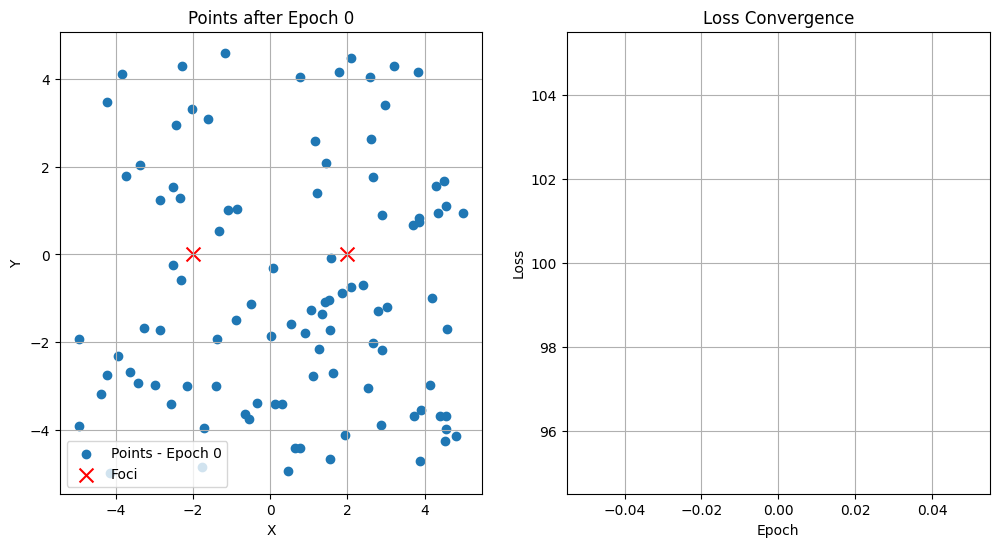

Epoch 0: Loss = 100.000000


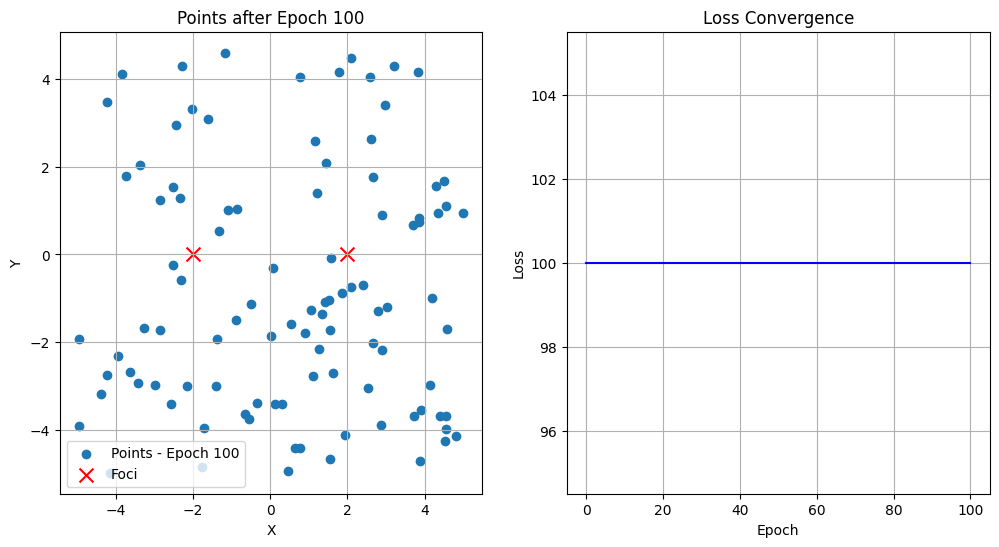

Epoch 100: Loss = 100.000000


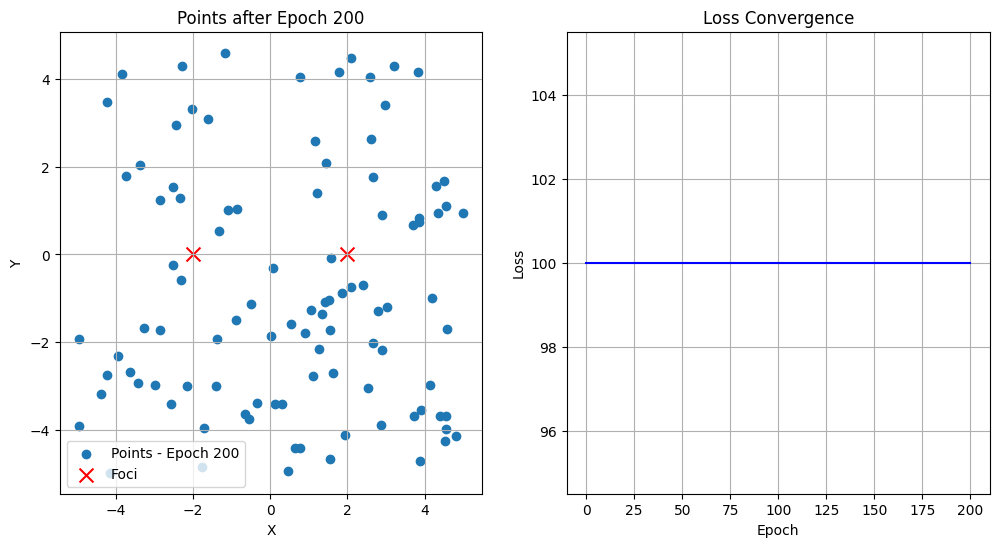

Epoch 200: Loss = 100.000000


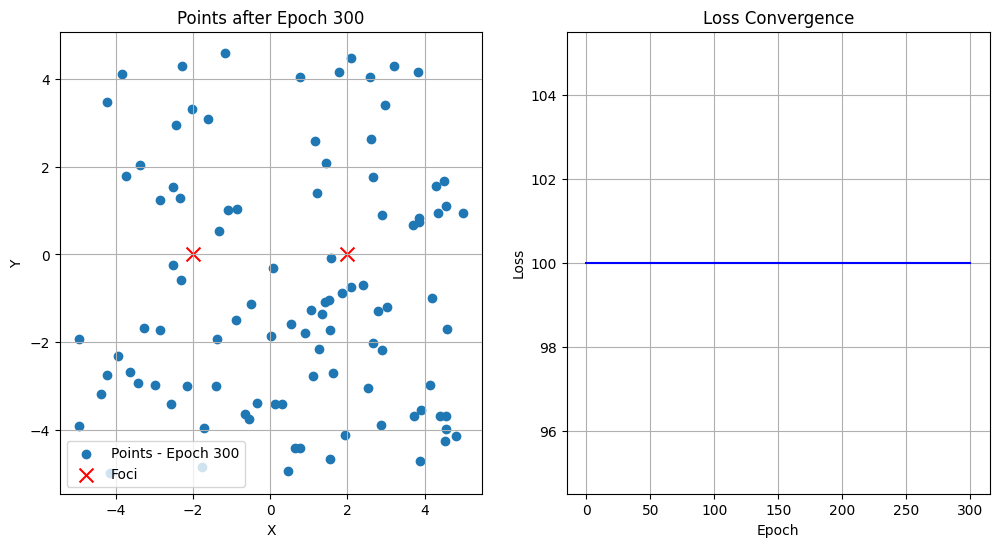

Epoch 300: Loss = 100.000000


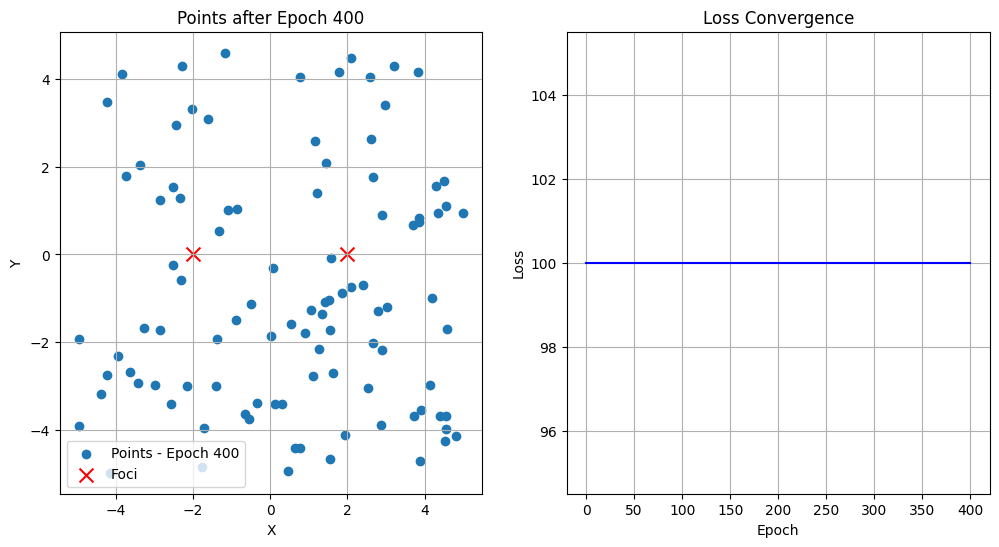

Epoch 400: Loss = 100.000000


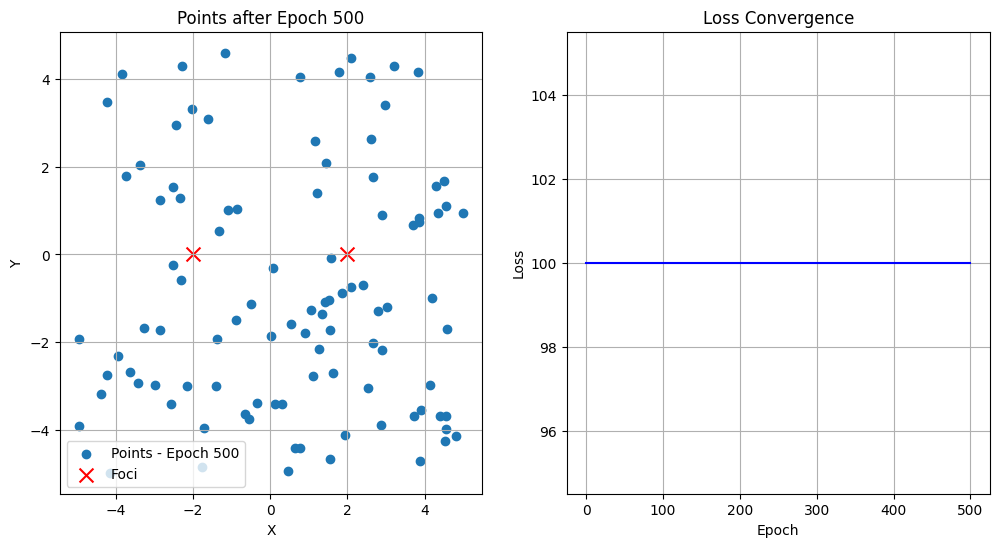

Epoch 500: Loss = 100.000000


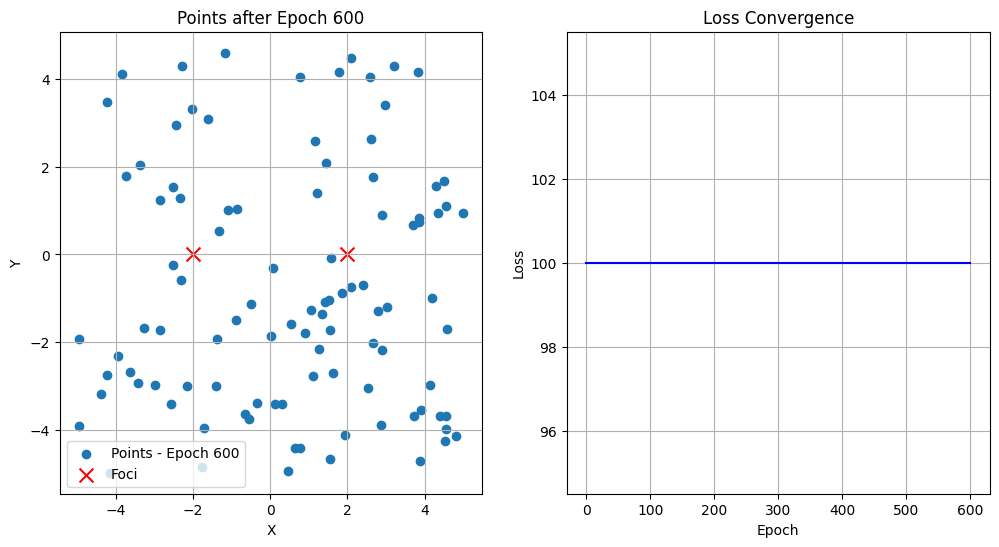

Epoch 600: Loss = 100.000000


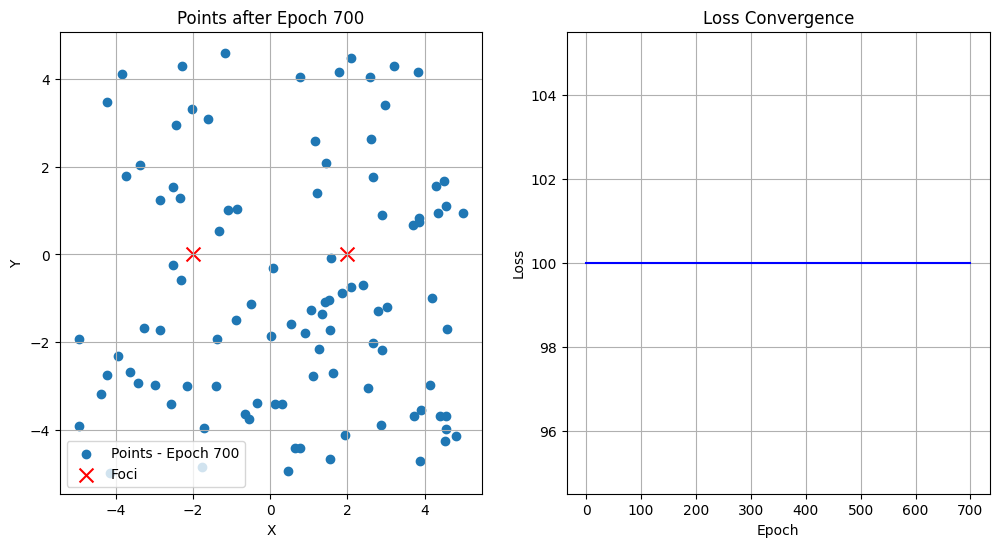

Epoch 700: Loss = 100.000000


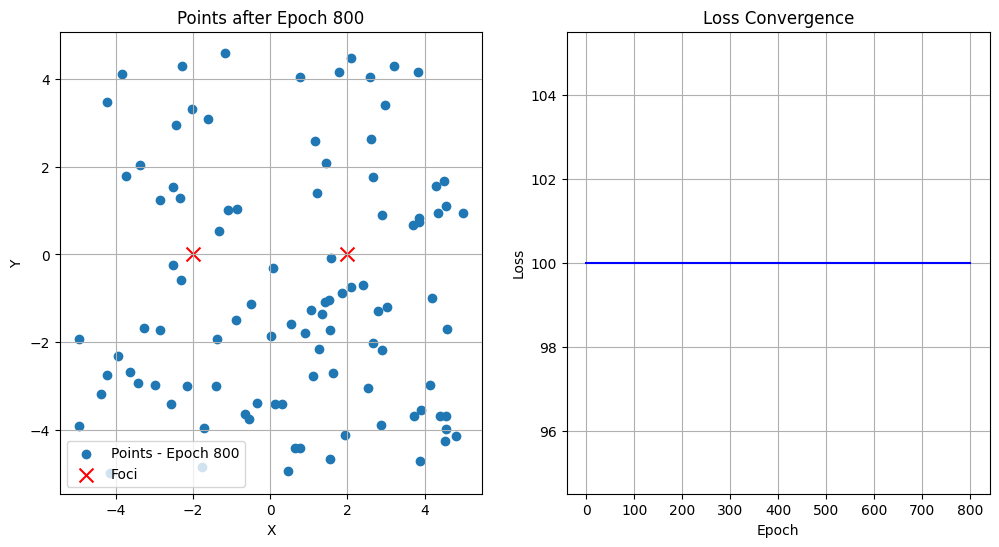

Epoch 800: Loss = 100.000000


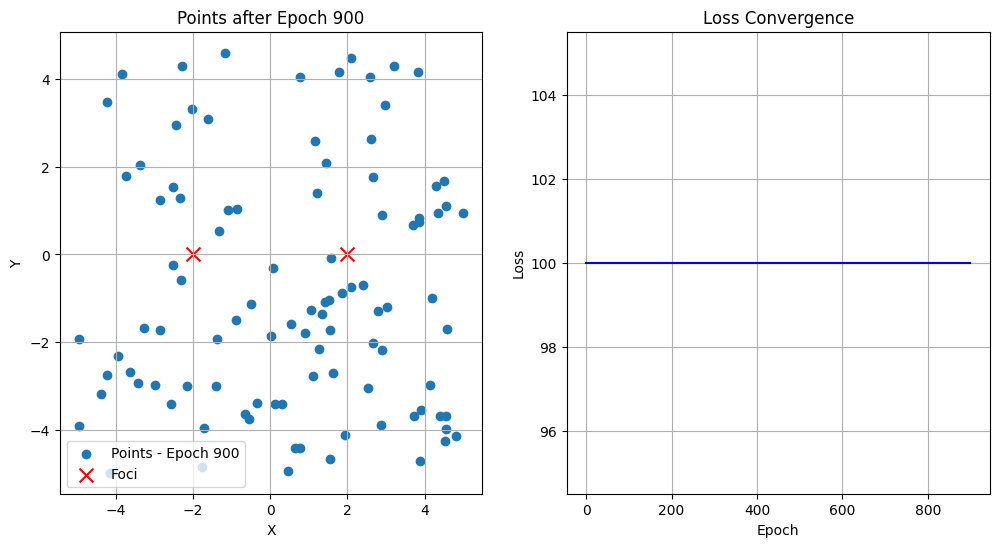

Epoch 900: Loss = 100.000000


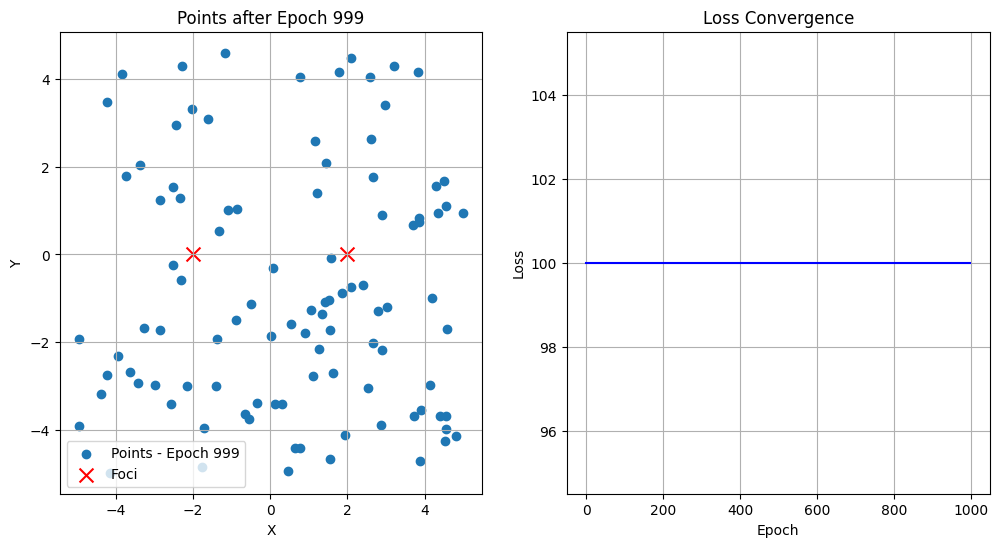

Elapsed time: 11.047763586044312 seconds


In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# Fix the random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Define ellipse parameters
focus1 = torch.tensor([-2.0, 0.0])  # First focus
focus2 = torch.tensor([2.0, 0.0])   # Second focus
constant_sum = 6.0  # The sum of distances to the two foci

# Initialize random 2D points from uniform distribution
num_points = 100
points = torch.rand((num_points, 2)) * 10 - 5  # Uniformly distributed in [-5, 5]
points.requires_grad = True

def plot_results(epoch, trajectories, loss_history=None):
    if loss_history is not None:
      fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    else:
      fig, axes = plt.subplots(1, 1, figsize=(6, 6))
      axes = [axes]
    points = np.array([trajectories[i][-1] for i in range(num_points)])
    # Left plot: Scatter of points with trajectories
    axes[0].scatter(points[:, 0], points[:, 1], label=f'Points - Epoch {epoch}')
    f1 = focus1.detach().cpu().numpy()
    f2 = focus2.detach().cpu().numpy()
    axes[0].scatter([f1[0], f2[0]], [f1[1], f2[1]], color='red', marker='x', s=100, label='Foci')

    # Draw movement traces
    for i in range(num_points):
        trajectory = np.array(trajectories[i])
        axes[0].plot(trajectory[:, 0], trajectory[:, 1], color='gray', linestyle='-', linewidth=0.5)

    axes[0].set_xlabel('X')
    axes[0].set_ylabel('Y')
    axes[0].legend()


    axes[0].grid()

    if loss_history is not None:
      axes[0].set_title(f'Points after Epoch {epoch}')
      # Right plot: Loss history
      axes[1].plot(loss_history, color='blue')
      axes[1].set_xlabel("Epoch")
      axes[1].set_ylabel("Loss")
      axes[1].set_title("Loss Convergence")
      axes[1].grid()
    else:
      axes[0].set_title(f'Points before Epoch {epoch}')

    plt.show()

# Reset trajectories
trajectories = [[] for _ in range(num_points)]
loss_history = []


import time
# Start timing
start_time = time.time()


# Define optimizer
optimizer = torch.optim.Adam([points], lr=0.1)

# Training loop
num_epochs = 1000
for epoch in range(num_epochs):
    optimizer.zero_grad()

    # Compute distances to both foci
    dist1 = torch.norm(points - focus1, dim=1)
    dist2 = torch.norm(points - focus2, dim=1)

    # Compute loss
    loss = torch.linalg.norm(dist1 + dist2 - constant_sum, ord=0)

    loss.backward()
    optimizer.step()

    loss_history.append(loss.item())

    # Store current positions for tracking movement
    for i in range(num_points):
        trajectories[i].append(points[i].detach().cpu().clone().numpy())

    # Plot results every 100th epoch
    if epoch % 100 == 0:
        plot_results(epoch, trajectories, loss_history)

    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Loss = {loss.item():.6f}")

#Final plot
plot_results(epoch, trajectories, loss_history)


# End timing
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

The $L_0$ loss function:
$$L_0(\varepsilon) = \sum_{i}{1(\varepsilon_i\neq 0)}$$
is not differentiable at $\varepsilon=0$ and has derivative (gradient) equal to $0$ everywhere else. Therefore is it impossible to perform training, which involves removing some part of the gradient at each iteration. The loss will be constant, because the optimizer has nothing to subtract when updating weights. That's the reason why the ellipse cannot be drawn at all.

# $L_1$ loss

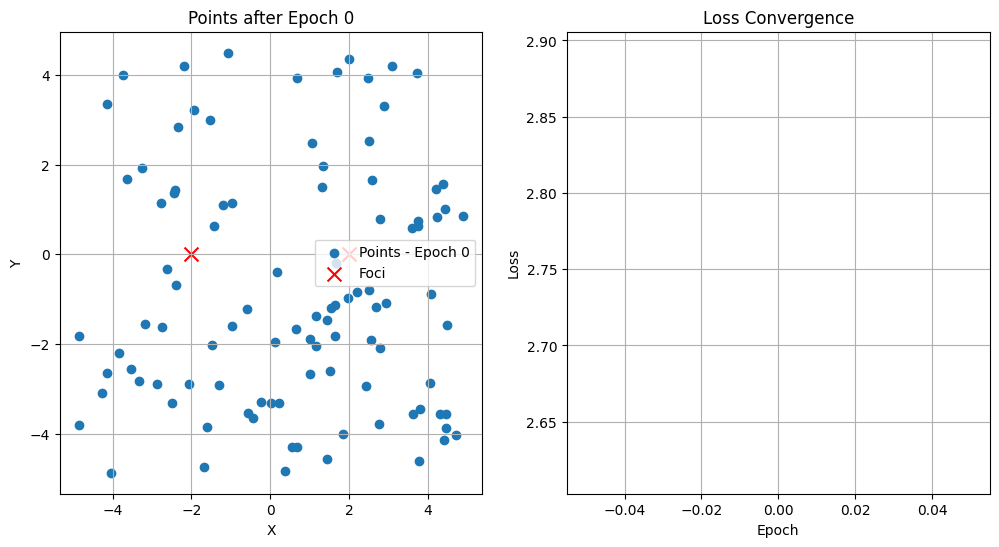

Epoch 0: Loss = 2.754212


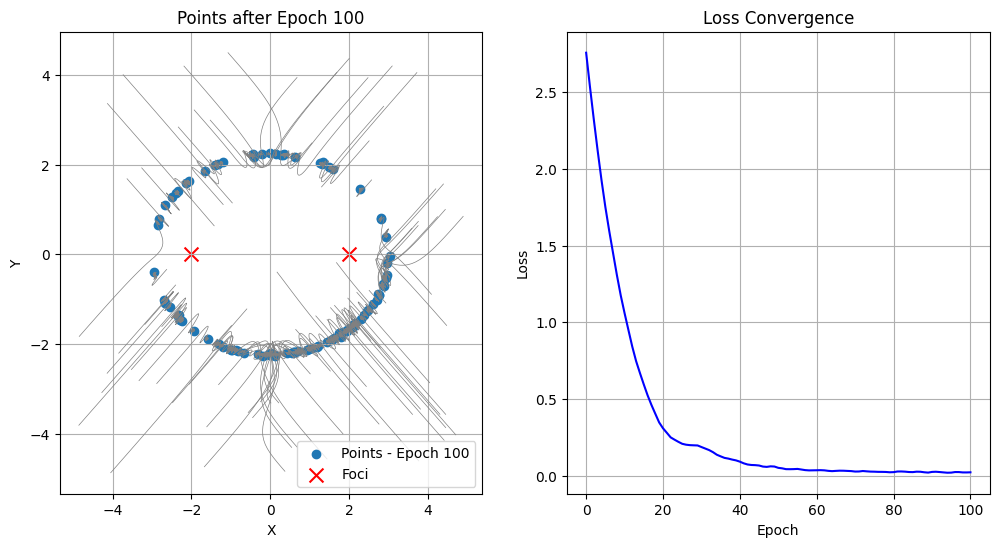

Epoch 100: Loss = 0.024422


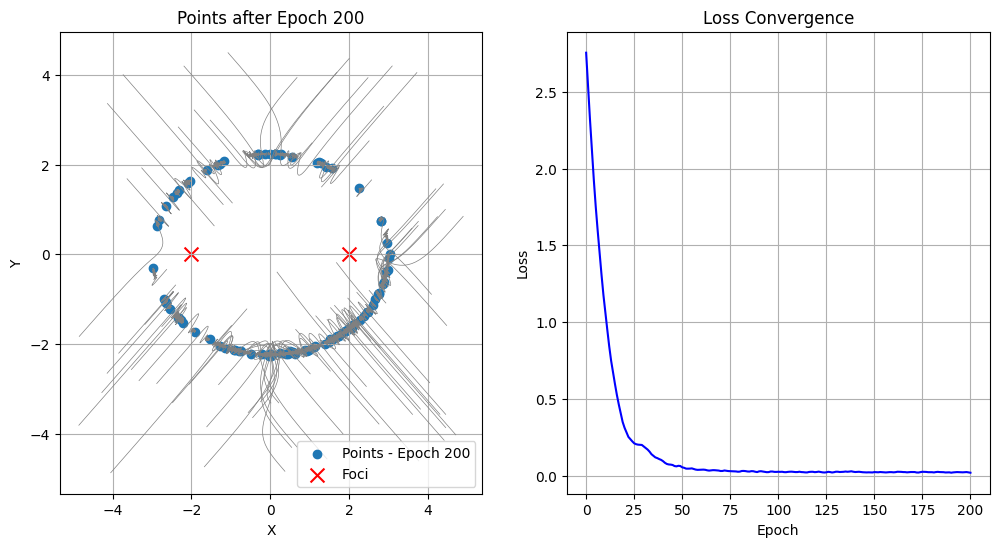

Epoch 200: Loss = 0.018269


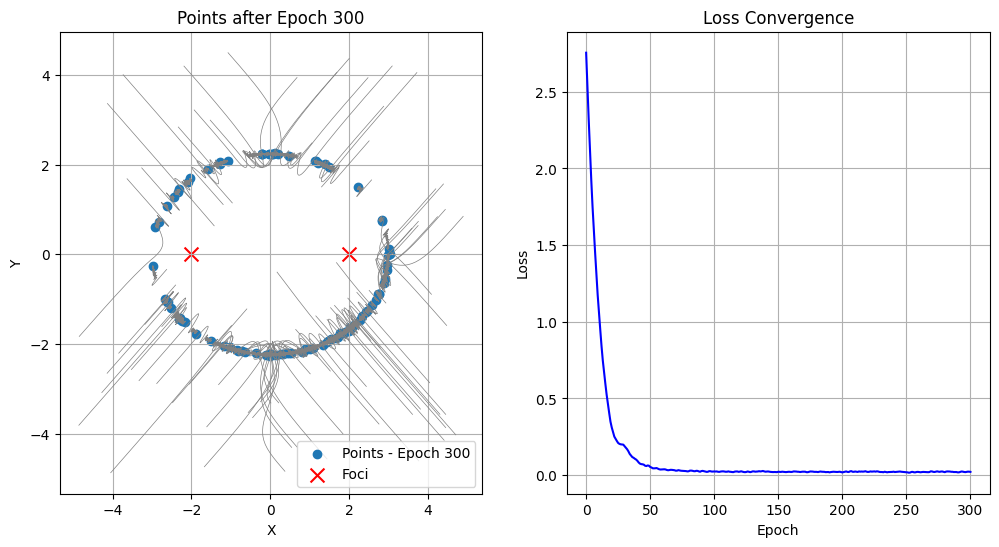

Epoch 300: Loss = 0.021560


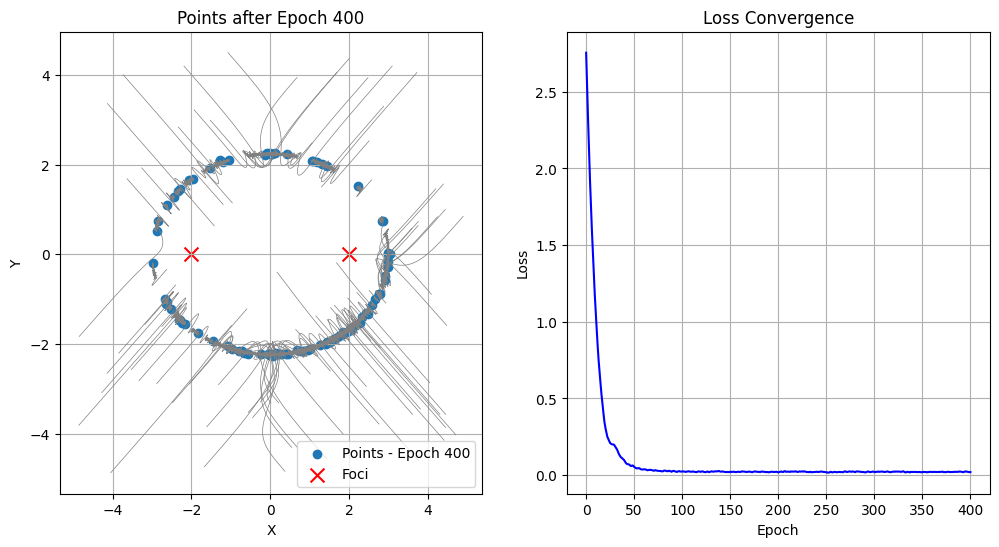

Epoch 400: Loss = 0.020092


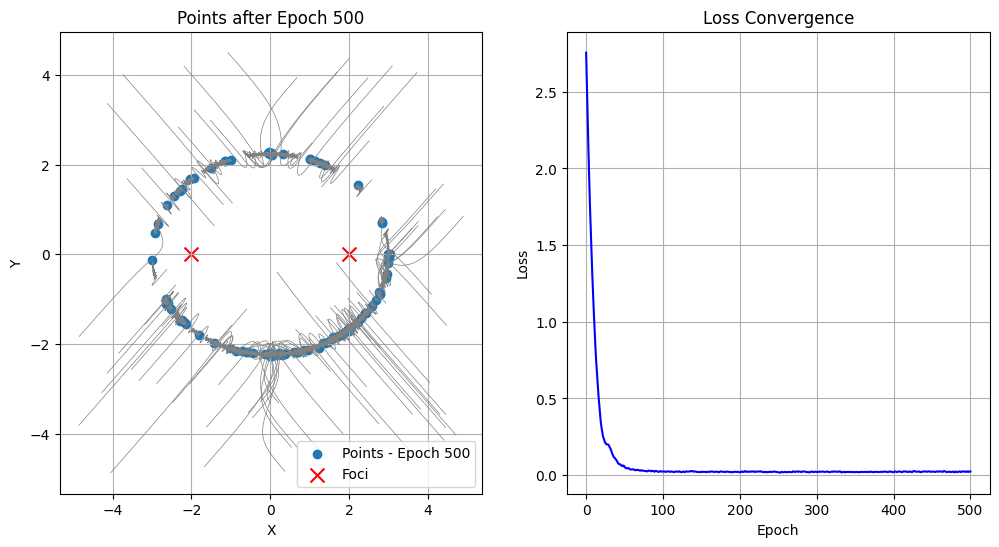

Epoch 500: Loss = 0.023886


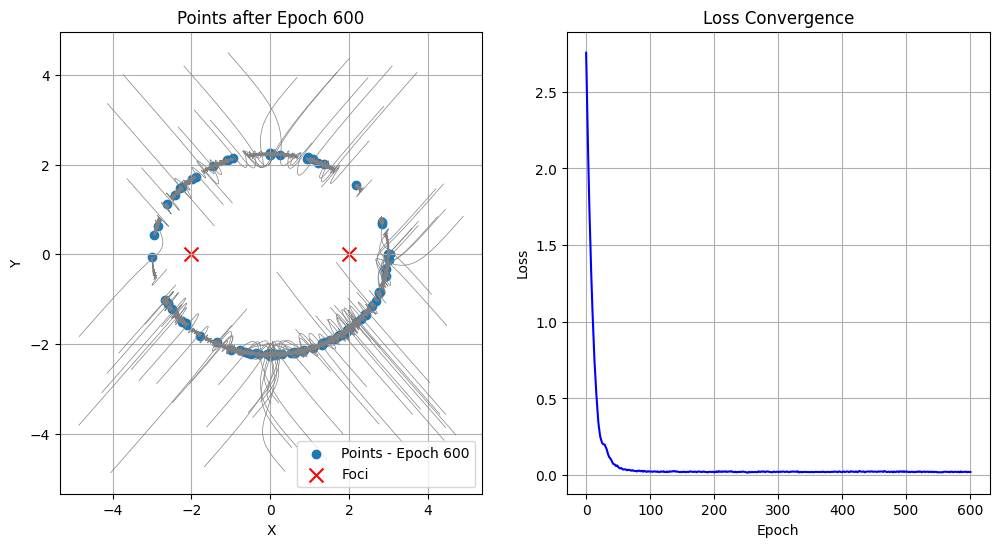

Epoch 600: Loss = 0.021063


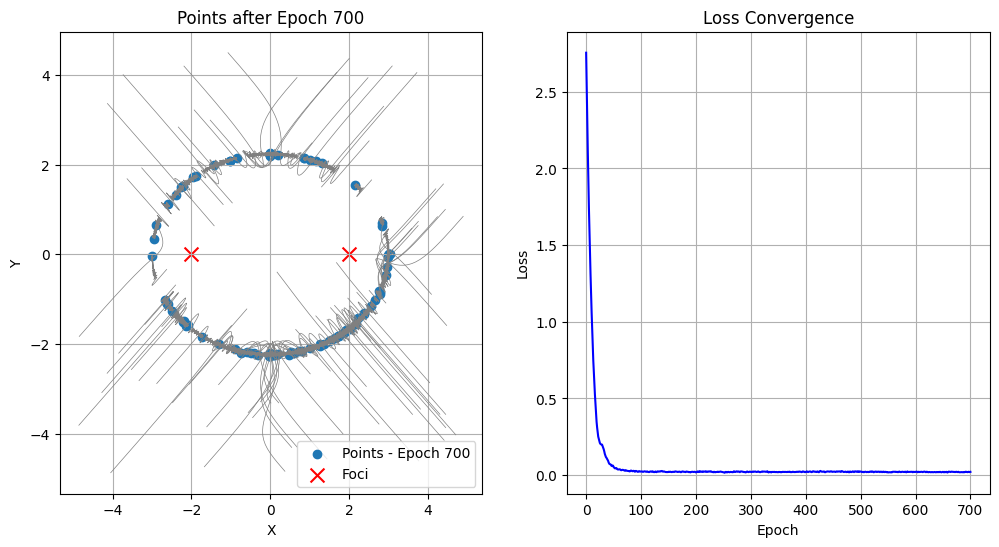

Epoch 700: Loss = 0.021499


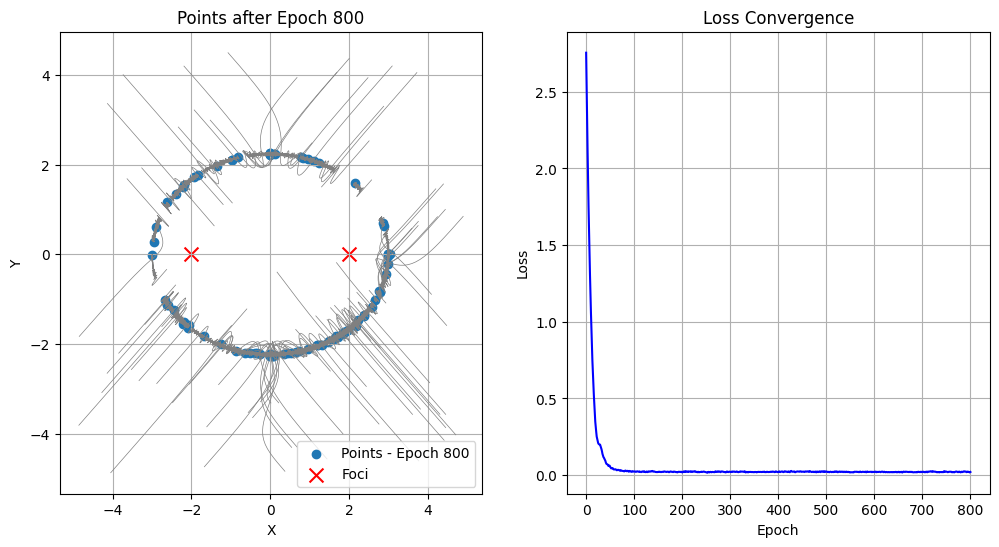

Epoch 800: Loss = 0.020740


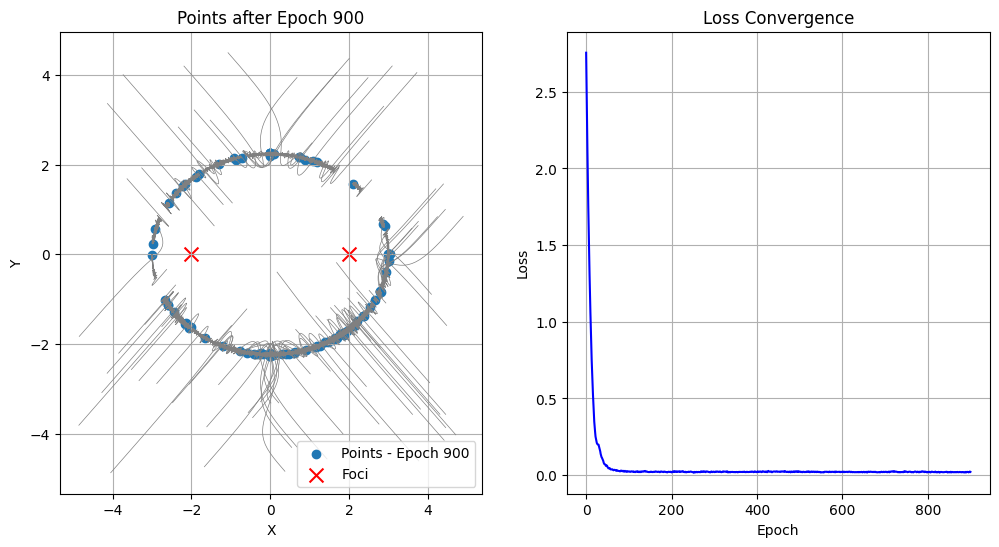

Epoch 900: Loss = 0.021521


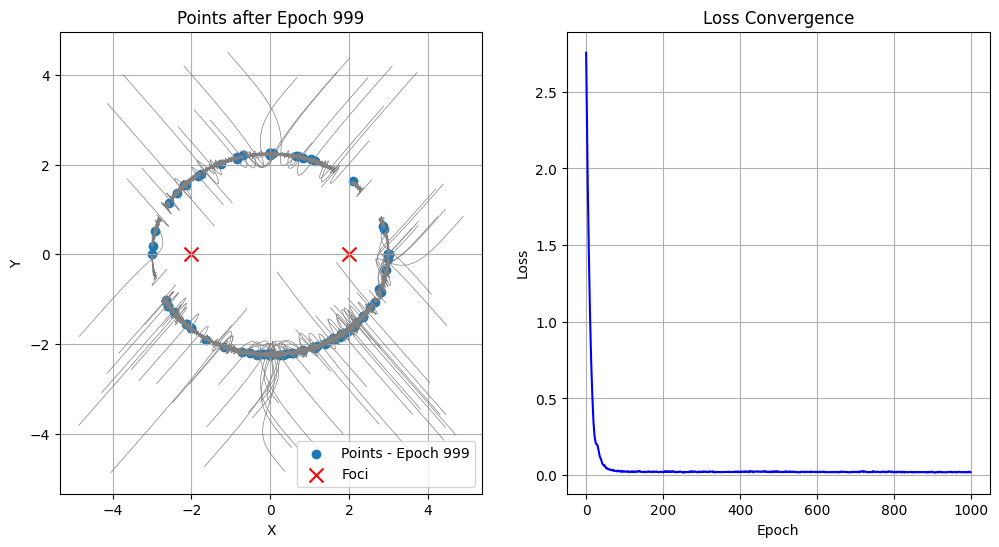

Elapsed time: 12.322106122970581 seconds


In [2]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# Fix the random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Define ellipse parameters
focus1 = torch.tensor([-2.0, 0.0])  # First focus
focus2 = torch.tensor([2.0, 0.0])   # Second focus
constant_sum = 6.0  # The sum of distances to the two foci

# Initialize random 2D points from uniform distribution
num_points = 100
points = torch.rand((num_points, 2)) * 10 - 5  # Uniformly distributed in [-5, 5]
points.requires_grad = True

def plot_results(epoch, trajectories, loss_history=None):
    if loss_history is not None:
      fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    else:
      fig, axes = plt.subplots(1, 1, figsize=(6, 6))
      axes = [axes]
    points = np.array([trajectories[i][-1] for i in range(num_points)])
    # Left plot: Scatter of points with trajectories
    axes[0].scatter(points[:, 0], points[:, 1], label=f'Points - Epoch {epoch}')
    f1 = focus1.detach().cpu().numpy()
    f2 = focus2.detach().cpu().numpy()
    axes[0].scatter([f1[0], f2[0]], [f1[1], f2[1]], color='red', marker='x', s=100, label='Foci')

    # Draw movement traces
    for i in range(num_points):
        trajectory = np.array(trajectories[i])
        axes[0].plot(trajectory[:, 0], trajectory[:, 1], color='gray', linestyle='-', linewidth=0.5)

    axes[0].set_xlabel('X')
    axes[0].set_ylabel('Y')
    axes[0].legend()


    axes[0].grid()

    if loss_history is not None:
      axes[0].set_title(f'Points after Epoch {epoch}')
      # Right plot: Loss history
      axes[1].plot(loss_history, color='blue')
      axes[1].set_xlabel("Epoch")
      axes[1].set_ylabel("Loss")
      axes[1].set_title("Loss Convergence")
      axes[1].grid()
    else:
      axes[0].set_title(f'Points before Epoch {epoch}')

    plt.show()

# Reset trajectories
trajectories = [[] for _ in range(num_points)]
loss_history = []


import time
# Start timing
start_time = time.time()


# Define optimizer
optimizer = torch.optim.Adam([points], lr=0.1)

# Training loop
num_epochs = 1000
for epoch in range(num_epochs):
    optimizer.zero_grad()

    # Compute distances to both foci
    dist1 = torch.norm(points - focus1, dim=1)
    dist2 = torch.norm(points - focus2, dim=1)

    # Compute loss
    loss = torch.mean(torch.abs(dist1 + dist2 - constant_sum))

    loss.backward()
    optimizer.step()

    loss_history.append(loss.item())

    # Store current positions for tracking movement
    for i in range(num_points):
        trajectories[i].append(points[i].detach().cpu().clone().numpy())

    # Plot results every 100th epoch
    if epoch % 100 == 0:
        plot_results(epoch, trajectories, loss_history)

    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Loss = {loss.item():.6f}")

#Final plot
plot_results(epoch, trajectories, loss_history)


# End timing
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

We can observe that the loss value stabilizes around $0.02$ and cannot be further reduced. This is probably due to the fact that the $L_1$ loss:
$$L_1(\varepsilon) = \sum_i{|\varepsilon_i|}$$
is not differentiable at point $\varepsilon=0$ (and cannot be extended to a differentiable function). This causes the gradient to "jump" when $\varepsilon\approx0$ (coordinate-wise) instead of gradually decrease to $0$ and cause the loss to eventually converge to $0$. This happens only when the loss is small enough, which explains why the ellipse is drawn well enough ($L_1$ can drop the loss very close to $0$, but not converge to $0$).

# $L_{\infty}$ loss

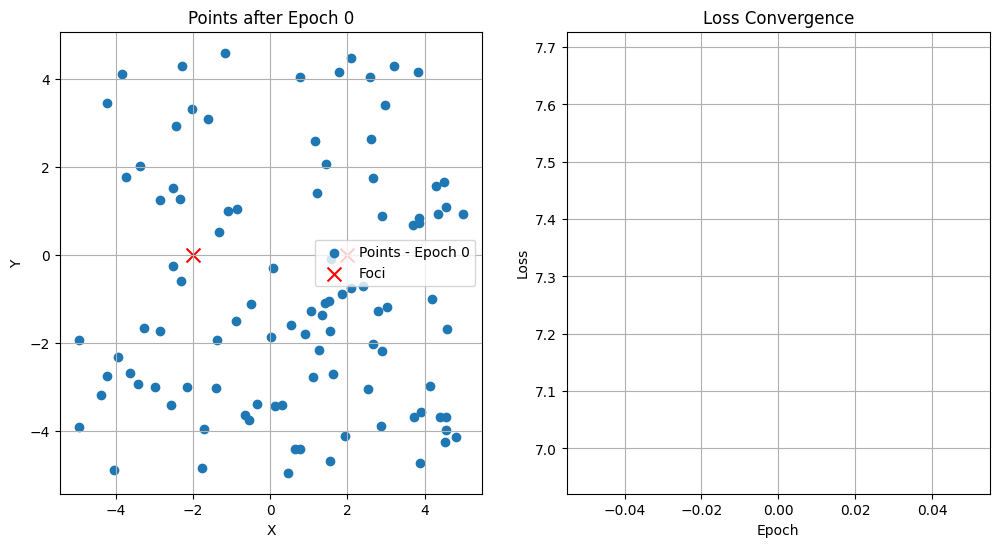

Epoch 0: Loss = 7.323938


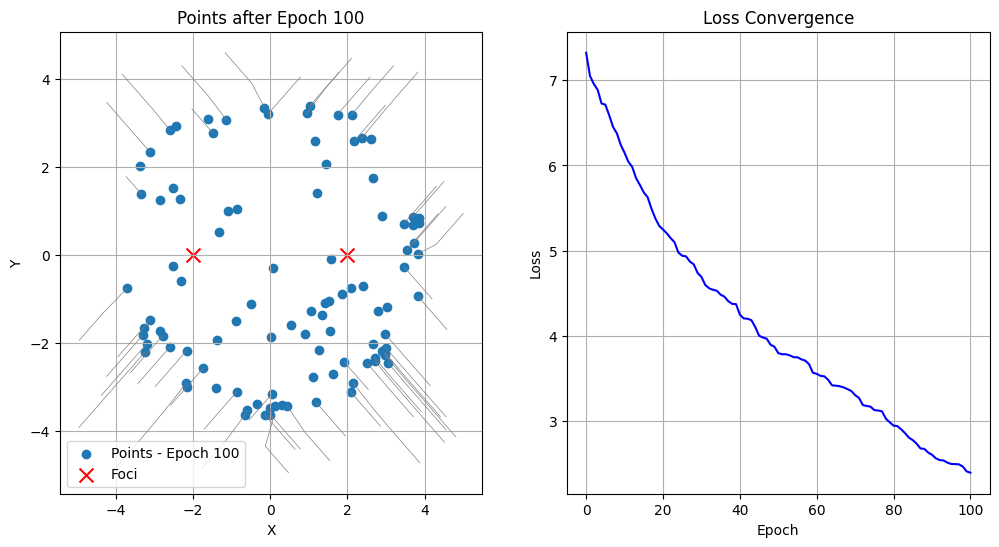

Epoch 100: Loss = 2.393175


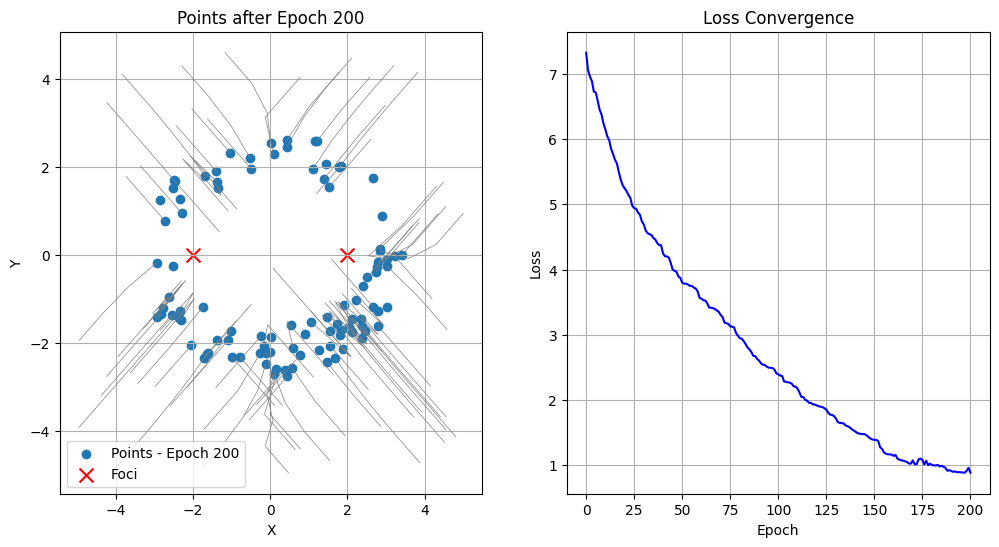

Epoch 200: Loss = 0.886059


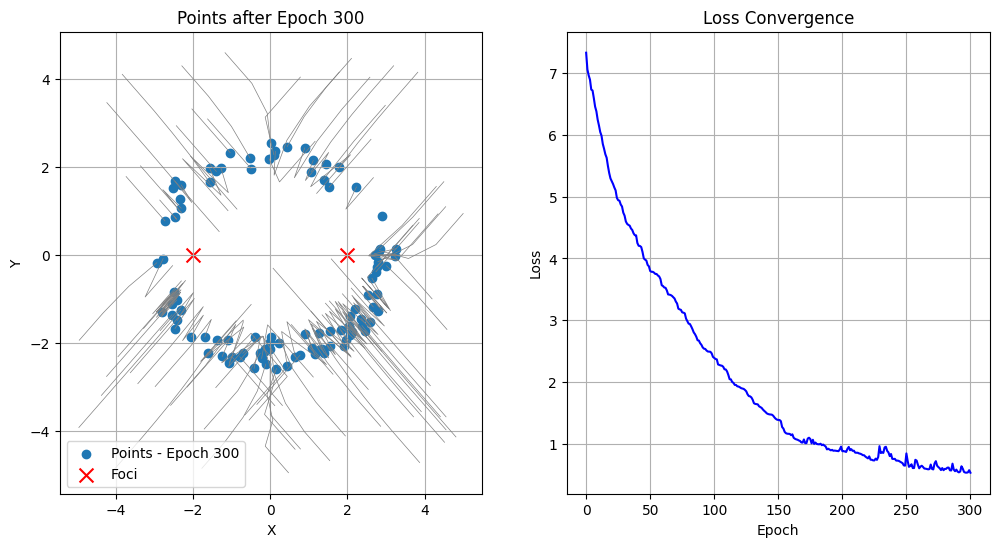

Epoch 300: Loss = 0.537401


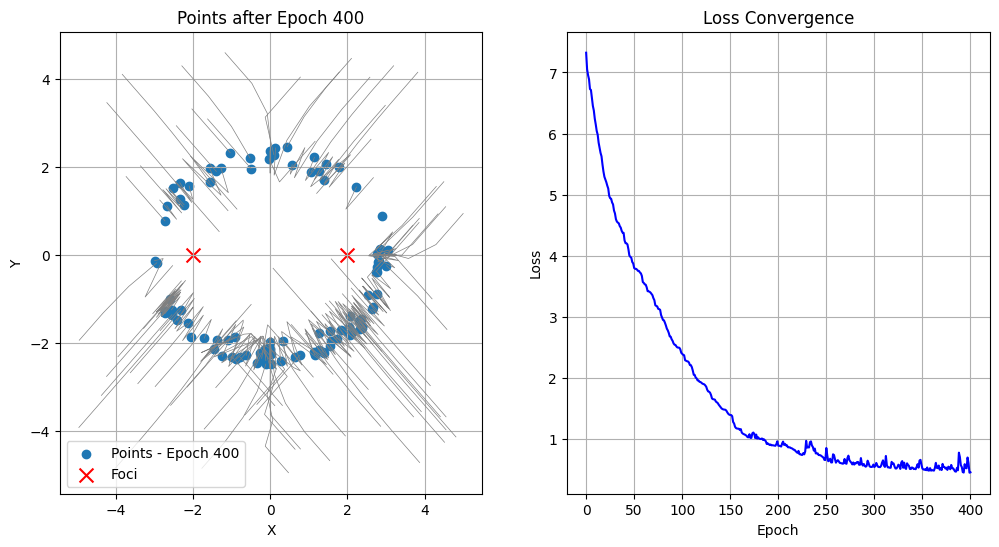

Epoch 400: Loss = 0.450674


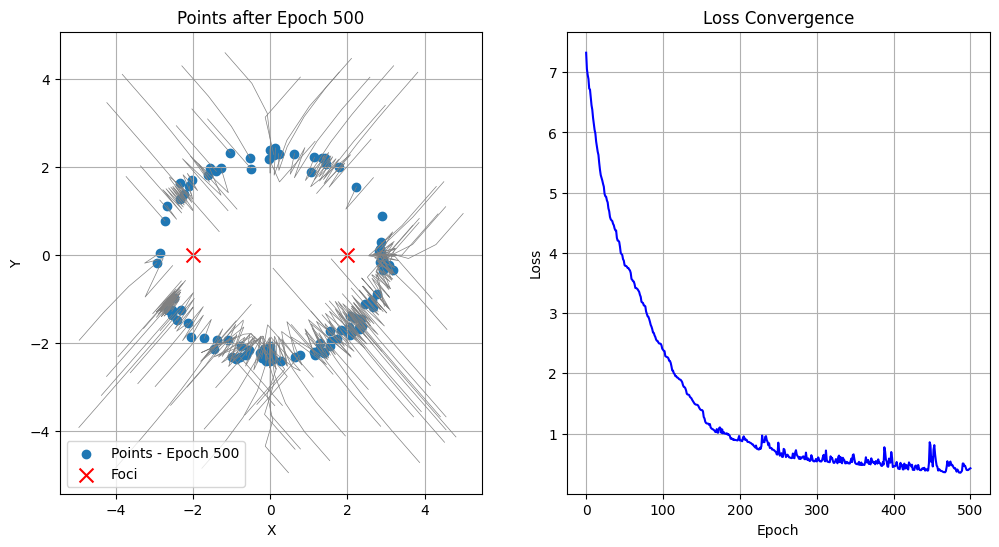

Epoch 500: Loss = 0.422950


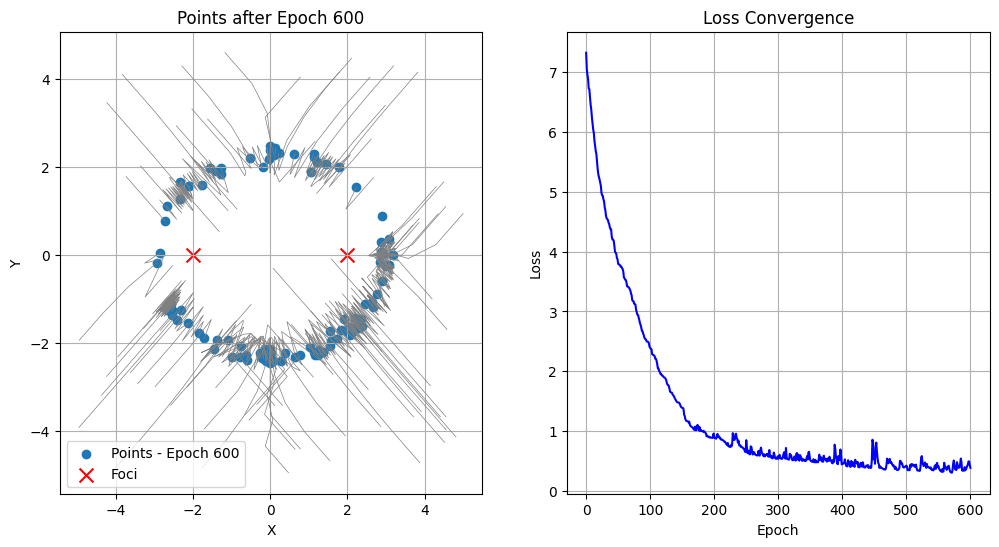

Epoch 600: Loss = 0.386727


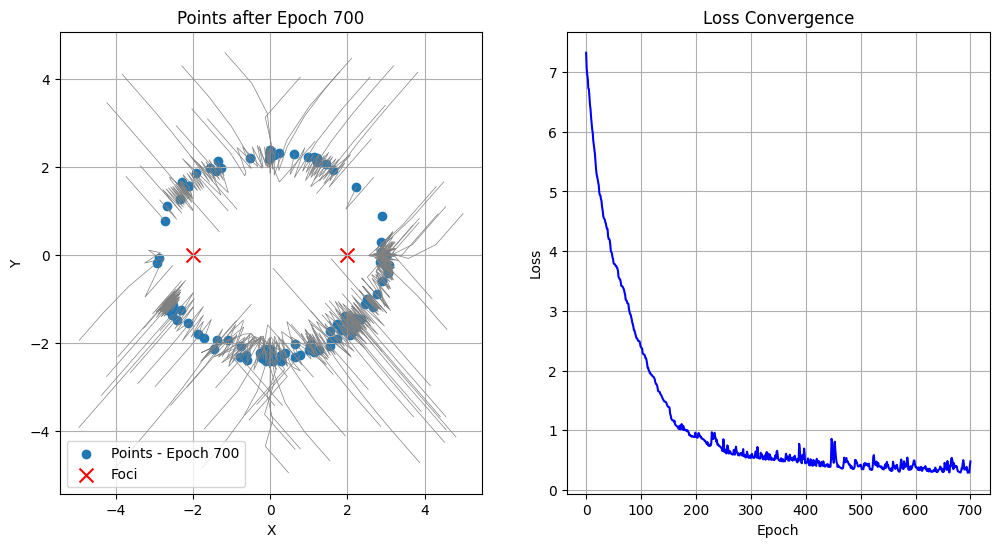

Epoch 700: Loss = 0.477610


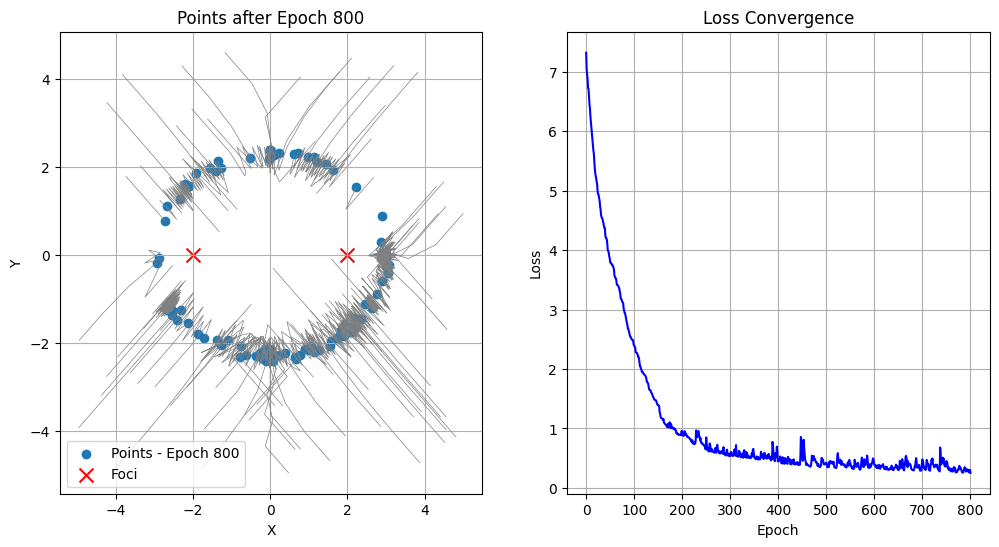

Epoch 800: Loss = 0.254017


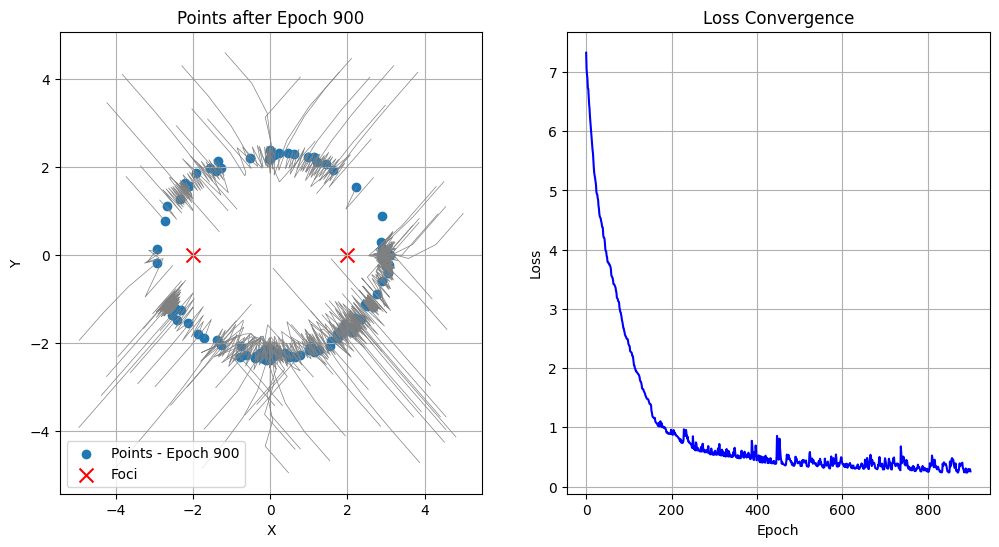

Epoch 900: Loss = 0.257051


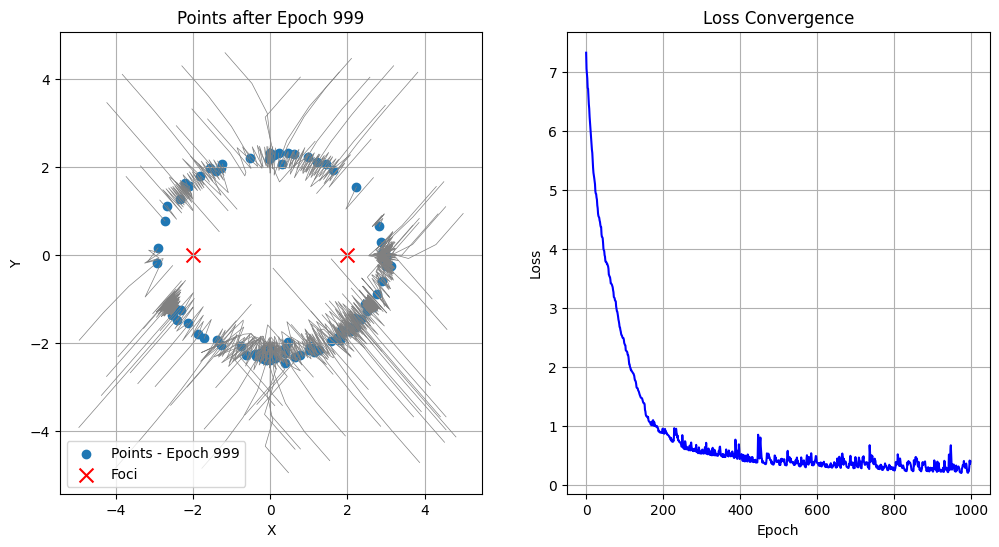

Elapsed time: 14.059056043624878 seconds


In [3]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# Fix the random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Define ellipse parameters
focus1 = torch.tensor([-2.0, 0.0])  # First focus
focus2 = torch.tensor([2.0, 0.0])   # Second focus
constant_sum = 6.0  # The sum of distances to the two foci

# Initialize random 2D points from uniform distribution
num_points = 100
points = torch.rand((num_points, 2)) * 10 - 5  # Uniformly distributed in [-5, 5]
points.requires_grad = True

def plot_results(epoch, trajectories, loss_history=None):
    if loss_history is not None:
      fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    else:
      fig, axes = plt.subplots(1, 1, figsize=(6, 6))
      axes = [axes]
    points = np.array([trajectories[i][-1] for i in range(num_points)])
    # Left plot: Scatter of points with trajectories
    axes[0].scatter(points[:, 0], points[:, 1], label=f'Points - Epoch {epoch}')
    f1 = focus1.detach().cpu().numpy()
    f2 = focus2.detach().cpu().numpy()
    axes[0].scatter([f1[0], f2[0]], [f1[1], f2[1]], color='red', marker='x', s=100, label='Foci')

    # Draw movement traces
    for i in range(num_points):
        trajectory = np.array(trajectories[i])
        axes[0].plot(trajectory[:, 0], trajectory[:, 1], color='gray', linestyle='-', linewidth=0.5)

    axes[0].set_xlabel('X')
    axes[0].set_ylabel('Y')
    axes[0].legend()


    axes[0].grid()

    if loss_history is not None:
      axes[0].set_title(f'Points after Epoch {epoch}')
      # Right plot: Loss history
      axes[1].plot(loss_history, color='blue')
      axes[1].set_xlabel("Epoch")
      axes[1].set_ylabel("Loss")
      axes[1].set_title("Loss Convergence")
      axes[1].grid()
    else:
      axes[0].set_title(f'Points before Epoch {epoch}')

    plt.show()

# Reset trajectories
trajectories = [[] for _ in range(num_points)]
loss_history = []


import time
# Start timing
start_time = time.time()


# Define optimizer
optimizer = torch.optim.Adam([points], lr=0.1)

# Training loop
num_epochs = 1000
for epoch in range(num_epochs):
    optimizer.zero_grad()

    # Compute distances to both foci
    dist1 = torch.norm(points - focus1, dim=1)
    dist2 = torch.norm(points - focus2, dim=1)

    # Compute loss
    loss = torch.max(torch.abs(dist1 + dist2 - constant_sum))

    loss.backward()
    optimizer.step()

    loss_history.append(loss.item())

    # Store current positions for tracking movement
    for i in range(num_points):
        trajectories[i].append(points[i].detach().cpu().clone().numpy())

    # Plot results every 100th epoch
    if epoch % 100 == 0:
        plot_results(epoch, trajectories, loss_history)

    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Loss = {loss.item():.6f}")

#Final plot
plot_results(epoch, trajectories, loss_history)


# End timing
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

The $L_\infty$ norm focuses at every epoch on the worst case (the most-distant point from the goal). The "point cloud" at the beginning of training is random, so there are many point that are similarly "distant" from the optimization goal, i.e. have similar deviation of $dist1 + dist_2$ from $constant\_sum$. At each epoch, only one of these points is being corrected, so it takes a long time to bring all these points to form an ellipse.

On the other hand, when the points start to look like they are forming an ellipse, the problems with differentiability of $|.|$ come into play - the values under $max(.)$ are near $0$, which causes the gradient to "jump" due to its discontinuity and, as a result, we don't see perfect convergence (see $L_1$ section).